## A4_Common_Analysis:

In [1]:
import os
import datetime

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import (FuncFormatter)

from pprint import pprint as pp
from tqdm import tqdm



## Process Data for Confirmed  Cases:

In [2]:
df_raw_us_confirmed_cases= pd.read_csv('/Users/dinsind/Documents/A4_common_Analysis/raw/RAW_us_confirmed_cases.csv',
                                   low_memory=False)





In [3]:
df_raw_us_confirmed_cases.head()

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,...,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21
0,Alabama,Autauga,84001001,US,USA,840,1001.0,US,32.539527,-86.644082,...,9910,9954,9967,10043,10047,10048,10061,10083,10219,10228
1,Alabama,Baldwin,84001003,US,USA,840,1003.0,US,30.727750,-87.722071,...,37167,37192,37224,37245,37258,37266,37285,37325,37350,37372
2,Alabama,Barbour,84001005,US,USA,840,1005.0,US,31.868263,-85.387129,...,3565,3566,3575,3577,3578,3578,3583,3595,3596,3596
3,Alabama,Bibb,84001007,US,USA,840,1007.0,US,32.996421,-87.125115,...,4236,4240,4246,4251,4252,4253,4256,4262,4275,4276
4,Alabama,Blount,84001009,US,USA,840,1009.0,US,33.982109,-86.567906,...,10132,10162,10179,10192,10197,10207,10227,10338,10364,10371


## Extract the Data for the assigned Country:


In [4]:
County = 'DuPage'
State = 'Illinois'
Population = 932877

In [5]:
# Cleaning steps:

df_raw_us_confirmed_cases = df_raw_us_confirmed_cases.melt(id_vars=["Province_State","Admin2","UID","iso2","iso3","code3","FIPS","Country_Region","Lat","Long_", "Combined_Key"], 
        var_name="Date", 
        value_name="ConfirmedCases")



df_raw_us_confirmed_cases.head()


,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,Combined_Key,Date,ConfirmedCases
0,Alabama,Autauga,84001001,US,USA,840,1001.0,US,32.539527,-86.644082,"Autauga, Alabama, US",1/22/20,0
1,Alabama,Baldwin,84001003,US,USA,840,1003.0,US,30.727750,-87.722071,"Baldwin, Alabama, US",1/22/20,0
2,Alabama,Barbour,84001005,US,USA,840,1005.0,US,31.868263,-85.387129,"Barbour, Alabama, US",1/22/20,0
3,Alabama,Bibb,84001007,US,USA,840,1007.0,US,32.996421,-87.125115,"Bibb, Alabama, US",1/22/20,0
4,Alabama,Blount,84001009,US,USA,840,1009.0,US,33.982109,-86.567906,"Blount, Alabama, US",1/22/20,0


In [6]:
#Date Format:


df_raw_us_confirmed_cases['Date'] = pd.to_datetime(df_raw_us_confirmed_cases['Date'], format='%m/%d/%y')
df_raw_us_confirmed_cases.head(5)


,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,Combined_Key,Date,ConfirmedCases
0,Alabama,Autauga,84001001,US,USA,840,1001.0,US,32.539527,-86.644082,"Autauga, Alabama, US",2020-01-22,0
1,Alabama,Baldwin,84001003,US,USA,840,1003.0,US,30.727750,-87.722071,"Baldwin, Alabama, US",2020-01-22,0
2,Alabama,Barbour,84001005,US,USA,840,1005.0,US,31.868263,-85.387129,"Barbour, Alabama, US",2020-01-22,0
3,Alabama,Bibb,84001007,US,USA,840,1007.0,US,32.996421,-87.125115,"Bibb, Alabama, US",2020-01-22,0
4,Alabama,Blount,84001009,US,USA,840,1009.0,US,33.982109,-86.567906,"Blount, Alabama, US",2020-01-22,0


In [7]:

# rename Coloumns:

df_raw_us_confirmed_cases = df_raw_us_confirmed_cases.rename(columns = {'Admin2':'County'})
df_raw_us_confirmed_cases = df_raw_us_confirmed_cases.rename(columns = {'Country_Region': 'Country'})
df_raw_us_confirmed_cases = df_raw_us_confirmed_cases.rename(columns = {'Province_State':'State'})
df_raw_us_confirmed_cases.head()

,State,County,UID,iso2,iso3,code3,FIPS,Country,Lat,Long_,Combined_Key,Date,ConfirmedCases
0,Alabama,Autauga,84001001,US,USA,840,1001.0,US,32.539527,-86.644082,"Autauga, Alabama, US",2020-01-22,0
1,Alabama,Baldwin,84001003,US,USA,840,1003.0,US,30.727750,-87.722071,"Baldwin, Alabama, US",2020-01-22,0
2,Alabama,Barbour,84001005,US,USA,840,1005.0,US,31.868263,-85.387129,"Barbour, Alabama, US",2020-01-22,0
3,Alabama,Bibb,84001007,US,USA,840,1007.0,US,32.996421,-87.125115,"Bibb, Alabama, US",2020-01-22,0
4,Alabama,Blount,84001009,US,USA,840,1009.0,US,33.982109,-86.567906,"Blount, Alabama, US",2020-01-22,0


In [8]:
#  we need data from February 1, 2020 through October 15, 2021

df_raw_us_confirmed_cases = df_raw_us_confirmed_cases[(df_raw_us_confirmed_cases['Date'] >= '2020-02-01') & (df_raw_us_confirmed_cases['Date'] <= '2021-10-15')]
df_raw_us_confirmed_cases.head(10)



,State,County,UID,iso2,iso3,code3,FIPS,Country,Lat,Long_,Combined_Key,Date,ConfirmedCases
33420,Alabama,Autauga,84001001,US,USA,840,1001.0,US,32.539527,-86.644082,"Autauga, Alabama, US",2020-02-01,0
33421,Alabama,Baldwin,84001003,US,USA,840,1003.0,US,30.727750,-87.722071,"Baldwin, Alabama, US",2020-02-01,0
33422,Alabama,Barbour,84001005,US,USA,840,1005.0,US,31.868263,-85.387129,"Barbour, Alabama, US",2020-02-01,0
33423,Alabama,Bibb,84001007,US,USA,840,1007.0,US,32.996421,-87.125115,"Bibb, Alabama, US",2020-02-01,0
33424,Alabama,Blount,84001009,US,USA,840,1009.0,US,33.982109,-86.567906,"Blount, Alabama, US",2020-02-01,0
33425,Alabama,Bullock,84001011,US,USA,840,1011.0,US,32.100305,-85.712655,"Bullock, Alabama, US",2020-02-01,0
33426,Alabama,Butler,84001013,US,USA,840,1013.0,US,31.753001,-86.680575,"Butler, Alabama, US",2020-02-01,0
33427,Alabama,Calhoun,84001015,US,USA,840,1015.0,US,33.774837,-85.826304,"Calhoun, Alabama, US",2020-02-01,0
33428,Alabama,Chambers,84001017,US,USA,840,1017.0,US,32.913601,-85.390727,"Chambers, Alabama, US",2020-02-01,0
33429,Alabama,Cherokee,84001019,US,USA,840,1019.0,US,34.178060,-85.606390,"Cherokee, Alabama, US",2020-02-01,0


In [9]:


illinios_cases=df_raw_us_confirmed_cases[(df_raw_us_confirmed_cases['State'] == 'Illinois') & (df_raw_us_confirmed_cases['County'] == 'DuPage')]
illinios_cases.head()
                                                                                                              
                                                                                                              

,State,County,UID,iso2,iso3,code3,FIPS,Country,Lat,Long_,Combined_Key,Date,ConfirmedCases
34068,Illinois,DuPage,84017043,US,USA,840,17043.0,US,41.85117,-88.086427,"DuPage, Illinois, US",2020-02-01,0
37410,Illinois,DuPage,84017043,US,USA,840,17043.0,US,41.85117,-88.086427,"DuPage, Illinois, US",2020-02-02,0
40752,Illinois,DuPage,84017043,US,USA,840,17043.0,US,41.85117,-88.086427,"DuPage, Illinois, US",2020-02-03,0
44094,Illinois,DuPage,84017043,US,USA,840,17043.0,US,41.85117,-88.086427,"DuPage, Illinois, US",2020-02-04,0
47436,Illinois,DuPage,84017043,US,USA,840,17043.0,US,41.85117,-88.086427,"DuPage, Illinois, US",2020-02-05,0


In [10]:
#lets save the data for  the iilnois with the given data range:
illinios_cases.to_csv('/Users/dinsind/Documents/A4_common_Analysis/Final/final_data.csv')


## Graph for the total Confirmed Cases in the county 
### February 1, 2020 through October 15, 2021

In [11]:
#Get Daily confirmed Cases:
illinios_cases = illinios_cases[["Date","ConfirmedCases"]]
illinios_cases.loc[:,'DailyCases'] = illinios_cases['ConfirmedCases'].diff().fillna(illinios_cases['ConfirmedCases'])
illinios_cases.to_csv('/Users/dinsind/Documents/A4_common_Analysis/Final/number_of_daily_cases.csv')

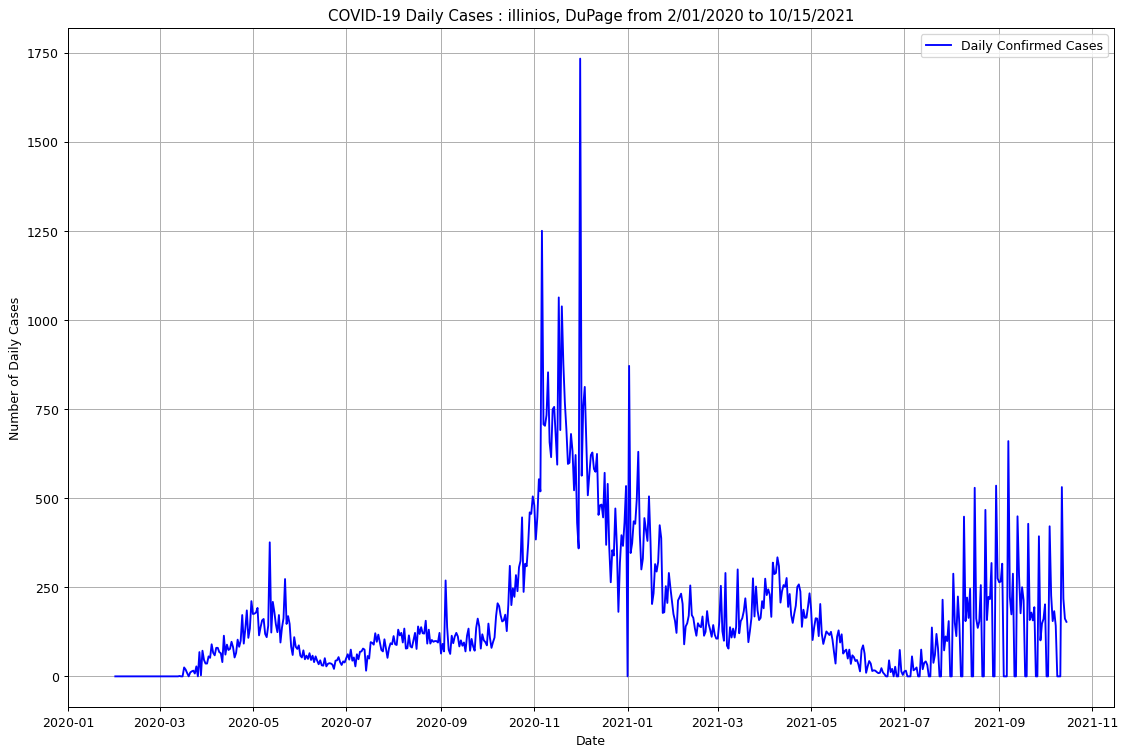

In [12]:

fig = plt.figure(figsize = (15,10),dpi=90)
plt.grid(True)

plt.plot(illinios_cases['Date'],illinios_cases['DailyCases'], color='blue', label='Daily Confirmed Cases')




plt.xlabel('Date')
plt.ylabel('Number of Daily Cases')
plt.title("COVID-19 Daily Cases : illinios, DuPage from 2/01/2020 to 10/15/2021")
plt.legend(loc=1)

# save to png
plt.savefig("/Users/dinsind/Documents/A4_common_Analysis/Final/illinois_daily_cases.png")

In [13]:
## CDC Mask Mandate  in Illinois:

#get the data:

df_mask_mandates = pd.read_csv('/Users/dinsind/Documents/A4_common_Analysis/raw/U.S._State_and_Territorial_Public_Mask_Mandates_From_April_10__2020_through_August_15__2021_by_County_by_Day.csv')
df_mask_use_by_county = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/mask-use/mask-use-by-county.csv')


In [14]:
df_mask_mandates.head()

,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
0,AL,Autauga County,1,1,4/10/2020,2,NaN,NaN,NaN,NaN
1,AL,Autauga County,1,1,4/11/2020,2,NaN,NaN,NaN,NaN
2,AL,Autauga County,1,1,4/12/2020,2,NaN,NaN,NaN,NaN
3,AL,Autauga County,1,1,4/13/2020,2,NaN,NaN,NaN,NaN
4,AL,Autauga County,1,1,4/14/2020,2,NaN,NaN,NaN,NaN


In [15]:
df_mask_use_by_county.head()

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,1001,0.053,0.074,0.134,0.295,0.444
1,1003,0.083,0.059,0.098,0.323,0.436
2,1005,0.067,0.121,0.120,0.201,0.491
3,1007,0.020,0.034,0.096,0.278,0.572
4,1009,0.053,0.114,0.180,0.194,0.459


In [16]:
# Look for Country : Illinois
illinois_mandate_df = df_mask_mandates[(df_mask_mandates['County_Name'] == 'DuPage County') & (df_mask_mandates['State_Tribe_Territory']=='IL')]
illinois_mandate_df.head()


,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
163887,IL,DuPage County,17,43,4/10/2020,2,NaN,NaN,NaN,NaN
163888,IL,DuPage County,17,43,4/11/2020,2,NaN,NaN,NaN,NaN
163889,IL,DuPage County,17,43,4/12/2020,2,NaN,NaN,NaN,NaN
163890,IL,DuPage County,17,43,4/13/2020,2,NaN,NaN,NaN,NaN
163891,IL,DuPage County,17,43,4/14/2020,2,NaN,NaN,NaN,NaN


In [17]:
# convert into required date type:
illinois_mandate_df['date'] = pd.to_datetime(illinois_mandate_df['date'], format='%m/%d/%Y')
illinois_mandate_df.head()

<ipython-input-17-0a9df8fb78bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  illinois_mandate_df['date'] = pd.to_datetime(illinois_mandate_df['date'], format='%m/%d/%Y')


,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
163887,IL,DuPage County,17,43,2020-04-10,2,NaN,NaN,NaN,NaN
163888,IL,DuPage County,17,43,2020-04-11,2,NaN,NaN,NaN,NaN
163889,IL,DuPage County,17,43,2020-04-12,2,NaN,NaN,NaN,NaN
163890,IL,DuPage County,17,43,2020-04-13,2,NaN,NaN,NaN,NaN
163891,IL,DuPage County,17,43,2020-04-14,2,NaN,NaN,NaN,NaN


In [18]:
# Need to filter data on our particluar time:
# for this Combining the two data sets:

illinios_cases = illinios_cases.rename(columns = {'Date':'date'})
illinios_cases.head()



,date,ConfirmedCases,DailyCases
34068,2020-02-01,0,0.0
37410,2020-02-02,0,0.0
40752,2020-02-03,0,0.0
44094,2020-02-04,0,0.0
47436,2020-02-05,0,0.0


In [19]:
#Combine two data sets on Date:
df_mergerd_data = illinios_cases.join(illinois_mandate_df.set_index('date'), on='date', how ='left').fillna(0)

In [20]:
df_mergerd_data.head()


,date,ConfirmedCases,DailyCases,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
34068,2020-02-01,0,0.0,0,0,0.0,0.0,0.0,0,0,0,0
37410,2020-02-02,0,0.0,0,0,0.0,0.0,0.0,0,0,0,0
40752,2020-02-03,0,0.0,0,0,0.0,0.0,0.0,0,0,0,0
44094,2020-02-04,0,0.0,0,0,0.0,0.0,0.0,0,0,0,0
47436,2020-02-05,0,0.0,0,0,0.0,0.0,0.0,0,0,0,0


In [21]:
df_mergerd_data['Population']='932877'
df_mergerd_data.head()
df_mergerd_data.to_csv('/Users/dinsind/Documents/A4_common_Analysis/Final/mergerd_data.csv')

In [22]:
df_mask_needed=df_mergerd_data.loc[(df_mergerd_data['Face_Masks_Required_in_Public']=='Yes')]
df_mask_needed.head()

,date,ConfirmedCases,DailyCases,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation,Population
334848,2020-05-01,3256,175.0,IL,DuPage County,17.0,43.0,1.0,Yes,Official,https://www2.illinois.gov/Documents/ExecOrders...,"Ill. Exec. Order No. 2020-32 (Apr. 30, 2020)",932877
338190,2020-05-02,3432,176.0,IL,DuPage County,17.0,43.0,1.0,Yes,Official,https://www2.illinois.gov/Documents/ExecOrders...,"Ill. Exec. Order No. 2020-32 (Apr. 30, 2020)",932877
341532,2020-05-03,3611,179.0,IL,DuPage County,17.0,43.0,1.0,Yes,Official,https://www2.illinois.gov/Documents/ExecOrders...,"Ill. Exec. Order No. 2020-32 (Apr. 30, 2020)",932877
344874,2020-05-04,3803,192.0,IL,DuPage County,17.0,43.0,1.0,Yes,Official,https://www2.illinois.gov/Documents/ExecOrders...,"Ill. Exec. Order No. 2020-32 (Apr. 30, 2020)",932877
348216,2020-05-05,3918,115.0,IL,DuPage County,17.0,43.0,1.0,Yes,Official,https://www2.illinois.gov/Documents/ExecOrders...,"Ill. Exec. Order No. 2020-32 (Apr. 30, 2020)",932877


In [23]:
df_mask_not_needed=df_mergerd_data.loc[(df_mergerd_data['Face_Masks_Required_in_Public']=='No')]
df_mask_not_needed.head()

,date,ConfirmedCases,DailyCases,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation,Population
1691700,2021-06-11,92281,17.0,IL,DuPage County,17.0,43.0,2.0,No,Official,https://coronavirus.illinois.gov/content/dam/s...,"Ill. Exec. Order No. 2021-12 (June 11, 2021)",932877
1695042,2021-06-12,92297,16.0,IL,DuPage County,17.0,43.0,2.0,No,Official,https://coronavirus.illinois.gov/content/dam/s...,"Ill. Exec. Order No. 2021-12 (June 11, 2021)",932877
1698384,2021-06-13,92309,12.0,IL,DuPage County,17.0,43.0,2.0,No,Official,https://coronavirus.illinois.gov/content/dam/s...,"Ill. Exec. Order No. 2021-12 (June 11, 2021)",932877
1701726,2021-06-14,92318,9.0,IL,DuPage County,17.0,43.0,2.0,No,Official,https://coronavirus.illinois.gov/content/dam/s...,"Ill. Exec. Order No. 2021-12 (June 11, 2021)",932877
1705068,2021-06-15,92328,10.0,IL,DuPage County,17.0,43.0,2.0,No,Official,https://coronavirus.illinois.gov/content/dam/s...,"Ill. Exec. Order No. 2021-12 (June 11, 2021)",932877


## Graph for : visulaize Daily cases in MaskMandate:

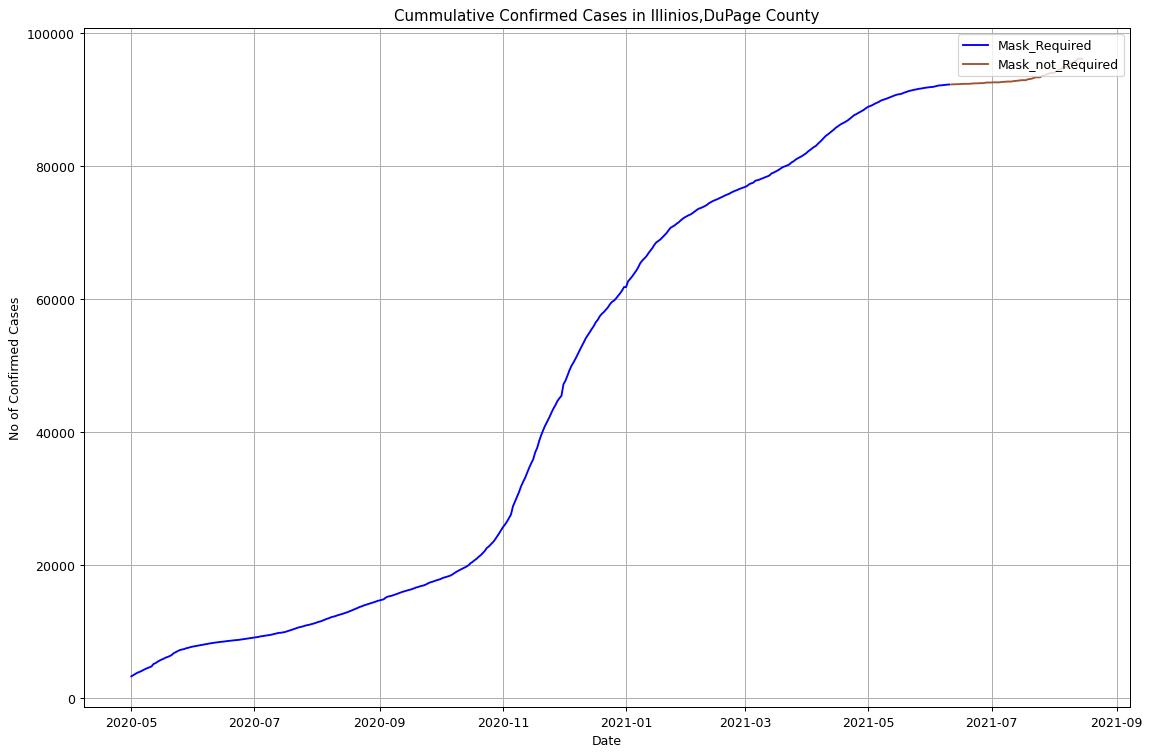

In [24]:


fig = plt.figure(figsize = (15,10),dpi=90)
plt.grid(True)


plt.plot(df_mask_needed["date"],df_mask_needed['ConfirmedCases'], color='blue', label='Mask_Required')
plt.plot(df_mask_not_needed["date"],df_mask_not_needed['ConfirmedCases'], color='sienna', label='Mask_not_Required')


plt.xlabel('Date')
plt.ylabel('No of Confirmed Cases')
plt.title("Cummulative Confirmed Cases in Illinios,DuPage County")
plt.legend(loc=1)

# save to png
plt.savefig("/Users/dinsind/Documents/A4_common_Analysis/Final/illinois_Cummulative_with_mask_on_Date.png")



# Graph for Mask and No MAsk

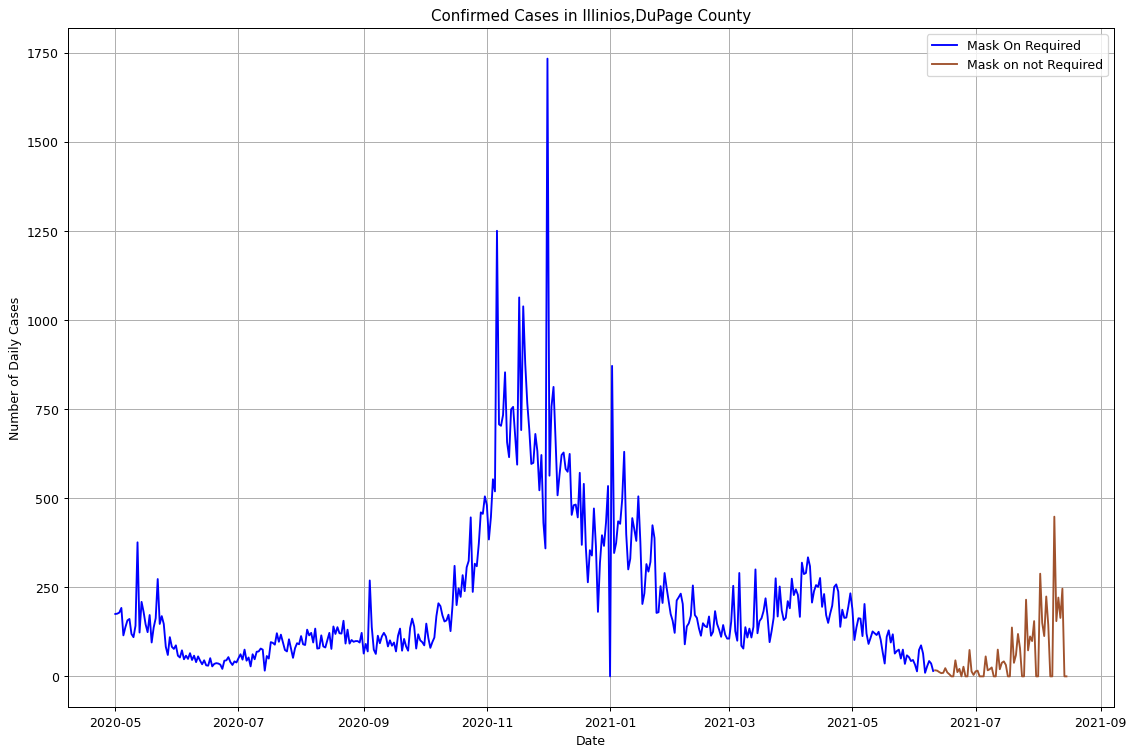

In [25]:
fig = plt.figure(figsize = (15,10),dpi=90)
plt.grid(True)

plt.plot(df_mask_needed["date"],df_mask_needed['DailyCases'], color='blue', label='Mask On Required')
plt.plot(df_mask_not_needed["date"],df_mask_not_needed['DailyCases'], color='sienna', label='Mask on not Required')



plt.xlabel('Date')
plt.ylabel('Number of Daily Cases')
plt.title("Confirmed Cases in Illinios,DuPage County")
plt.legend(loc=1)

# save to png
plt.savefig("/Users/dinsind/Documents/A4_common_Analysis/Final/viz_mask_mandate.png")